In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import datetime as dt
from random import sample 
import datetime as dt  


In [ ]:
 pd.set_option('display.max_columns', None)

In [3]:
df1 = pd.read_csv('Accidents_2005_to_2007.csv', dtype='unicode',index_col='Accident_Index')
df2 = pd.read_csv('Accidents_2009_to_2011.csv', dtype='unicode',index_col='Accident_Index')
df3 = pd.read_csv('Accidents_2012_to_2014.csv', dtype='unicode',index_col='Accident_Index')

In [4]:
frames = [df1, df2, df3]

In [5]:
data = pd.concat(frames)

In [6]:
vehicles=pd.read_csv('../dft-accident-data/Vehicles0515.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

In [7]:
data = data.join(vehicles, how='inner')

In [8]:
data

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680,178240,-0.19117,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005,1,9,0,18,0,0,0,0,0,0,1,1,15,2,74,10,-1,-1,-1,7,1
200501BS00002,524170,181650,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,Dual carriageway,30,NaN,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005,1,11,0,4,0,3,0,0,0,0,4,1,1,1,42,7,8268,2,3,-1,-1
200501BS00003,524520,182240,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005,1,11,0,17,0,0,0,4,0,0,4,1,1,1,35,6,8300,2,5,2,1
200501BS00003,524520,182240,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005,2,9,0,2,0,0,0,0,0,0,3,1,15,1,62,9,1762,1,6,1,1
200501BS00004,526900,177530,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005,1,9,0,18,0,0,0,0,0,0,1,1,15,2,49,8,1769,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201497UD20401,208842,576239,-4.993545,55.043813,97,3,2,1,16/01/2014,5,07:15,937,S12000028,3,77,Single carriageway,60,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014,2,9,0,18,0,0,0,0,0,0,1,1,2,1,32,6,1560,2,8,-1,3
201497UD20501,208217,575335,-5.002705,55.03546,97,3,1,1,16/01/2014,5,16:25,937,S12000028,3,77,Dual carriageway,60,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014,1,9,0,16,0,0,2,0,7,7,1,1,1,1,32,6,1994,1,12,-1,1
201497UD20601,210074,580286,-4.976987,55.080604,97,3,1,1,17/01/2014,6,18:32,937,S12000028,3,77,Dual carriageway,60,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014,1,19,0,17,0,0,2,0,1,4,1,1,1,1,40,7,2402,2,3,-1,1


In [9]:
data.Accident_Severity.replace(to_replace='3',value='0',inplace=True)
data.Accident_Severity.replace(to_replace='2',value='1',inplace=True)

In [10]:
dayOfWeek ={ '1':'Sunday', '2':'Monday', '3':'Tuesday', '4':'Wednesday', '5':'Thursday', '6':'Friday', '7':'Saturday'}

In [11]:
data=data.replace({"Day_of_Week": dayOfWeek})

In [12]:
data_M = data [['Day_of_Week','1st_Road_Class','Road_Type','Speed_limit','Pedestrian_Crossing-Human_Control',
          'Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Urban_or_Rural_Area',
          'Sex_of_Driver','Age_of_Driver','Engine_Capacity_(CC)','Accident_Severity'
,'Vehicle_Type'
,'Towing_and_Articulation'
,'Vehicle_Manoeuvre'
,'Vehicle_Location-Restricted_Lane'
,'Junction_Location'
,'Skidding_and_Overturning'
,'Hit_Object_in_Carriageway'
,'Vehicle_Leaving_Carriageway'
,'Hit_Object_off_Carriageway'
,'1st_Point_of_Impact'
,'Was_Vehicle_Left_Hand_Drive?'
,'Journey_Purpose_of_Driver'
,'Age_Band_of_Driver'
,'Age_of_Vehicle'
,'Driver_IMD_Decile'
,'Driver_Home_Area_Type'
,'Did_Police_Officer_Attend_Scene_of_Accident'
,'Special_Conditions_at_Site'
,'Carriageway_Hazards'
,'Junction_Control']]

In [13]:
data_M = pd.get_dummies(data_M, columns=['Day_of_Week','Road_Type','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Sex_of_Driver'
,'Vehicle_Type'
,'Towing_and_Articulation'
,'Vehicle_Manoeuvre'
,'Vehicle_Location-Restricted_Lane'
,'Junction_Location'
,'Skidding_and_Overturning'
,'Hit_Object_in_Carriageway'
,'Vehicle_Leaving_Carriageway'
,'Hit_Object_off_Carriageway'
,'1st_Point_of_Impact'
,'Was_Vehicle_Left_Hand_Drive?'
,'Journey_Purpose_of_Driver'
,'Age_Band_of_Driver'
,'Age_of_Vehicle'
,'Driver_IMD_Decile'
,'Driver_Home_Area_Type'
,'Did_Police_Officer_Attend_Scene_of_Accident'
,'Special_Conditions_at_Site'
,'Carriageway_Hazards'
,'Junction_Control'])

In [14]:
key_words = ('-1','None')

In [15]:
filter_col = [col for col in data_M.columns if col.endswith(key_words)]

In [16]:
data_M = data_M.drop(filter_col,axis = 1)

In [17]:
data_M.columns

Index(['1st_Road_Class', 'Speed_limit', 'Urban_or_Rural_Area', 'Age_of_Driver',
       'Engine_Capacity_(CC)', 'Accident_Severity', 'Day_of_Week_Friday',
       'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday',
       ...
       'Special_Conditions_at_Site_Roadworks',
       'Carriageway_Hazards_Any animal (except a ridden horse)',
       'Carriageway_Hazards_Dislodged vehicle load in carriageway',
       'Carriageway_Hazards_Involvement with previous accident',
       'Carriageway_Hazards_Other object in carriageway',
       'Carriageway_Hazards_Pedestrian in carriageway (not injured)',
       'Junction_Control_Authorised person',
       'Junction_Control_Automatic traffic signal',
       'Junction_Control_Giveway or uncontrolled',
       'Junction_Control_Stop Sign'],
      dtype='object', length=292)

In [18]:
data_M.shape

(1736655, 292)

In [19]:
import numpy as np
import time
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import StandardScaler
#from sklearn.tree import DecisionTreeClassifier

In [20]:
Tr = data_M.drop(['Accident_Severity'], axis=1)
dataColumns = [col for col in Tr.columns]

In [21]:
data_M['Accident_Severity'] = data_M['Accident_Severity'].astype(int)

In [22]:
from imblearn.under_sampling import RandomUnderSampler

In [23]:
    FSize = data_M[data_M['Accident_Severity']==1]['Accident_Severity'].size
    rus = RandomUnderSampler(sampling_strategy={0:FSize, 1:FSize})
    X_, Y_ = rus.fit_resample(data_M[dataColumns],data_M['Accident_Severity'])
    X_DF = pd.DataFrame(X_,columns=dataColumns)
    Y_DF = pd.DataFrame(Y_,columns=['Accident_Severity'])
    data_M = pd.concat([X_DF,Y_DF],axis=1)

In [24]:
data_M.groupby(['Accident_Severity']).size()

Accident_Severity
0    230039
1    230039
dtype: int64

In [25]:
data_M['Urban_or_Rural_Area'] = data_M['Urban_or_Rural_Area'].astype(int)
data_M['Speed_limit'] = data_M['Speed_limit'].astype(int)
data_M['1st_Road_Class'] = data_M['1st_Road_Class'].astype(int)

In [26]:
X = data_M.drop(['Accident_Severity'], axis=1)
Y = data_M['Accident_Severity']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [28]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

In [29]:
results_modelling_time = []

In [30]:
s = time.time()
model = RandomForestClassifier(n_estimators = 50)
model.fit(X_train, y_train)
e = time.time()

In [31]:
results_modelling_time.append({"library":"Pandas","time":float("{}".format(e-s)),"Algorithm":"Random Forest"})

In [32]:
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.41%


In [33]:
dataColumns=[] 
for col in X.columns: 
    dataColumns.append(col)

In [56]:
pd.DataFrame(model.feature_importances_, columns=['weights'], index=dataColumns).sort_values(by='weights',ascending=False).head(10)

,weights
Did_Police_Officer_Attend_Scene_of_Accident_Yes,0.147917
Vehicle_Type_5,0.061312
Junction_Location_0,0.054859
Vehicle_Manoeuvre_4,0.047093
Vehicle_Leaving_Carriageway_0,0.044867
Vehicle_Manoeuvre_3,0.043621
Vehicle_Type_9,0.041871
Urban_or_Rural_Area,0.041113
1st_Point_of_Impact_2,0.038028
Road_Type_Single carriageway,0.036360


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions,target_names=['0','1']))
unique_label = np.unique(y_test)
print(pd.DataFrame(confusion_matrix(y_test, predictions, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64     46110
           1       0.64      0.64      0.64     45906

    accuracy                           0.64     92016
   macro avg       0.64      0.64      0.64     92016
weighted avg       0.64      0.64      0.64     92016

        pred:0  pred:1
true:0   29669   16441
true:1   16304   29602


In [35]:
from sklearn.tree import DecisionTreeClassifier
s = time.time()
model = DecisionTreeClassifier(criterion="entropy", max_depth=100)
model.fit(X_train, y_train)
e = time.time()

In [36]:
results_modelling_time.append({"library":"Pandas","time":float("{}".format(e-s)),"Algorithm":"Decision Tree"})

In [37]:
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.15%


In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions,target_names=['0','1']))
unique_label = np.unique(y_test)
print(pd.DataFrame(confusion_matrix(y_test, predictions, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58     46110
           1       0.58      0.59      0.58     45906

    accuracy                           0.58     92016
   macro avg       0.58      0.58      0.58     92016
weighted avg       0.58      0.58      0.58     92016

        pred:0  pred:1
true:0   26611   19499
true:1   19007   26899


In [39]:
from xgboost import XGBClassifier

In [40]:
s = time.time()
model = XGBClassifier(nthread=50,base_score=0.5)
model.fit(X_train, y_train)
e = time.time()

In [41]:
print("Dask modelling Time = {}".format(e-s))

Dask modelling Time = 47.4747428894043


In [ ]:
#results_modelling_time.append({"library":"Pandas","time":float("{}".format(e-s)),"Algorithm":"xgboost"})

In [42]:
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.76%


In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions,target_names=['0','1']))
unique_label = np.unique(y_test)
print(pd.DataFrame(confusion_matrix(y_test, predictions, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62     46110
           1       0.62      0.69      0.65     45906

    accuracy                           0.64     92016
   macro avg       0.64      0.64      0.64     92016
weighted avg       0.64      0.64      0.64     92016

        pred:0  pred:1
true:0   27206   18904
true:1   14447   31459


In [44]:
from dask.distributed import Client

client = Client(n_workers=10)
import dask
import joblib

/opt/anaconda3/envs/plotly/lib/python3.8/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [45]:
from dask import dataframe as dd

In [46]:
data_M = dd.from_pandas(data_M, npartitions=8)
X = data_M.drop(['Accident_Severity'], axis=1)
Y = data_M['Accident_Severity']
    
from dask_ml.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

/opt/anaconda3/envs/plotly/lib/python3.8/site-packages/dask/array/random.py:25: FutureWarning: dask.array.random.doc_wraps is deprecated and will be removed in a future version
  warnings.warn(


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
s =time.time()
clf = RandomForestClassifier(n_estimators=50)
with joblib.parallel_backend("dask", scatter=[X_train, y_train]):
     clf.fit(X_train, y_train)
e = time.time()

/opt/anaconda3/envs/plotly/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [48]:
results_modelling_time.append({"library":"Dask","time":float("{}".format(e-s)),"Algorithm":"Random Forest"})

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib
s =time.time()
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)
with joblib.parallel_backend("dask", scatter=[X_train, y_train]):
     clf.fit(X_train, y_train)
e = time.time()

In [50]:
results_modelling_time.append({"library":"Dask","time":float("{}".format(e-s)),"Algorithm":"Decision Tree"})

In [51]:
from dask_ml.xgboost import XGBClassifier

In [52]:
s =time.time()
model = XGBClassifier()
model.fit(X_train, y_train)
e = time.time()
print("Dask modelling Time = {}".format(e-s))

Dask modelling Time = 89.78422784805298


In [ ]:
#results_modelling_time.append({"library":"Dask","time":float("{}".format(e-s)),"Algorithm":"xgboost"})

In [53]:
results_modelling_time

[{'library': 'Pandas', 'time': 94.8772828578949, 'Algorithm': 'Random Forest'},
 {'library': 'Pandas',
  'time': 22.041996955871582,
  'Algorithm': 'Decision Tree'},
 {'library': 'Dask', 'time': 50.719826221466064, 'Algorithm': 'Random Forest'},
 {'library': 'Dask', 'time': 19.360859870910645, 'Algorithm': 'Decision Tree'}]

In [54]:
results_modelling_time = pd.DataFrame(results_modelling_time)

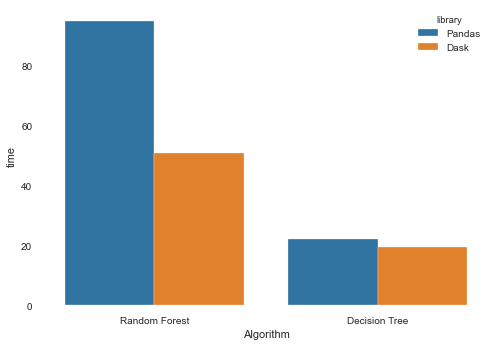

In [55]:
import seaborn as sns
sns.barplot(x='Algorithm', y='time',hue='library',  data=results_modelling_time)

In [ ]:
import dask_xgboost

In [ ]:
dask_xgboost.train(client,X_train, y_train,num_boost_round=10)

In [ ]:
ask_xgboost.train(client, params, X_train, y_train, num_boost_round=10)